## Imports

In [1]:
from dataset.dataset import MultiModalDataset
import PIL
import matplotlib.pyplot as plt
from mmaction.datasets import build_dataset
import torch
import os
import mmcv
import numpy as np

/home/sadat/miniconda3/envs/mmsign/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
os.chdir('../../..')

## Function to display image

In [3]:
def imshow(tensor, idx=0):
    plt.imshow(tensor.permute(1, 2, 3, 0)[idx])
    plt.axis('off')

## Multimodal Dataset

In [4]:

train_dataset = MultiModalDataset(ann_file='data/autsl/train_annotations.txt',
                                  root_dir='data/autsl/rawframes',
                                  clip_len=32,
                                  modalities=('rgb'),
                                  resolution=224,
                                  frame_interval=1,
                                  input_resolution=512,
                                  num_clips=1
                                  )

test_dataset = MultiModalDataset(ann_file='data/autsl/test_annotations.txt',
                                 root_dir='data/autsl/rawframes',
                                 clip_len=32,
                                 resolution=224,
                                 modalities=('rgb'),
                                 test_mode=True,
                                 frame_interval=1,
                                 input_resolution=512,
                                 num_clips=1
                                 )
# Setting up dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=1,
                                           shuffle=False,
                                           num_workers=4,
                                           pin_memory=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=4,
                                          pin_memory=False)

In [5]:
results = train_dataset.load_video(1)
results['frame_inds']

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])

In [6]:
iter_ = iter(test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


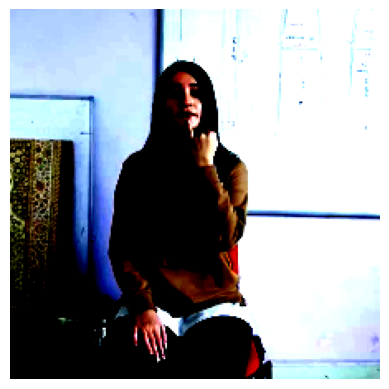

In [7]:
batch = next(iter_)
i=0
imshow(batch['rgb'][0],11)

In [8]:
len(batch)

2

In [9]:
batch[0].shape, batch[1].shape, batch[2].shape

KeyError: 0

In [ ]:
x = torch.FloatTensor(1,32,256,256).unsqueeze(dim=1)

In [ ]:
x.shape

In [ ]:
y = torch.cat((x,x,x), dim=1)
y.shape

In [ ]:
rgb = batch[0]

In [ ]:
rgb[0].shape

In [ ]:
len(batch[0])

In [ ]:
rgb = batch[0][0].squeeze()

In [ ]:
rgb.shape

## Finding the normalise values

In [ ]:
# i=0
# r_mean = 0
# g_mean = 0
# b_mean = 0

# r_std = 0
# g_std = 0
# b_std = 0
# iter_ = iter(train_loader)

In [ ]:
# while i < len(train_loader):
#     batch = next(iter_)
#     rgb = batch[0][0]

#     r_mean += rgb[0].mean().item()
#     g_mean += rgb[1].mean().item()
#     b_mean += rgb[2].mean().item()

#     r_std += rgb[0].std().item()
#     g_std += rgb[1].std().item()
#     b_std += rgb[2].std().item()

#     i+=1

In [ ]:
# r_mean/i, g_mean/i, b_mean/i

In [ ]:
# r_std/i, g_std/i, b_std/i

## MMCV Dataset

In [ ]:
# Set up dataset
train_cfg = dict(
    type='RawframeDataset',
    ann_file='data/wlasl/train_annotations.txt',
    data_prefix='data/wlasl/rawframes',
    pipeline=[
        dict(
            type='SampleFrames',
            clip_len=32,
            frame_interval=2,
            num_clips=1),
        dict(type='RawFrameDecode'),
        dict(type='Resize', scale=(-1, 256)),
#         dict(type='RandomResizedCrop', area_range=(0.4, 1.0)),
        dict(type='Resize', scale=(224, 224), keep_ratio=False),
#         dict(type='Flip', flip_ratio=0.5),
        dict(
            type='Normalize',
            mean=[123.675, 116.28, 103.53],
            std=[58.395, 57.12, 57.375],
            to_bgr=False),
        dict(type='FormatShape', input_format='NCTHW'),
        dict(type='Collect', keys=['imgs', 'label'], meta_keys=[]),
        dict(type='ToTensor', keys=['imgs', 'label'])
    ])

train_dataset = build_dataset(train_cfg)

test_cfg = dict(
        type='RawframeDataset',
        ann_file='data/wlasl/test_annotations.txt',
        data_prefix='data/wlasl/rawframes',
        test_mode=True,
        pipeline=[
            dict(
                    type='SampleFrames',
                    clip_len=32,
                    frame_interval=2,
                    num_clips=1,
                    test_mode=True),
            dict(type='RawFrameDecode'),
            dict(type='Resize', scale=(-1, 256)),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_bgr=False),
            dict(type='FormatShape', input_format='NCTHW'),
            dict(type='Collect', keys=['imgs', 'label'], meta_keys=[]),
            dict(type='ToTensor', keys=['imgs'])
        ])

# Building the datasets
test_dataset = build_dataset(test_cfg)

mmcv_test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                      batch_size=1,
                                      shuffle=False,
                                      num_workers=4,
                                      pin_memory=True)

In [ ]:
img_iter = iter(mmcv_test_loader)

In [ ]:
x = next(img_iter)
mmcv_imgs = x['imgs']
imshow(mmcv_imgs.squeeze(), 0)

In [ ]:
batch = next(iter_)
i=0
imshow(batch[0][0])

In [ ]:
video_iter = iter(mmcv_imgs.squeeze().permute(1,2,3,0))

In [ ]:
plt.imshow(next(video_iter))
plt.axis('off')